<a href="https://colab.research.google.com/github/ijustwanttoputcodehere/Notatniki-Jupyter/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AMaszynowe/ReutersPY.csv')

In [ ]:
df = df.iloc[:,:-1]

In [ ]:
df.fillna(0)

,labels,standard,oil,Co,and,BP,north,said,they,plan,to,form,a,ventur,manag,the,money,invest,activ,of,both,compani,Unnamed: 22,america,is,subsidiari,british,petroleum,lt,which,also,own,55,pct,interest,in,will,be,call,financi,...,satur,cdu,spd,coniston,rtz,pcw,walli,spencer,04/09/87,03/09/87,ttl,4/2/87,prev,Wk,Gr,Ay,cont,stcks,eddi,antar,campeau,conger,brooklyn,sinai,calmat,hodel,valeo,adb,eta,uccel,zimmerman,samjen,greenspan,syke,fild,datacard,decran,gerstner,phelan,dassler
0,usa,3,2,1,2,2,2,1,1,1,2,1,3,2,2,3,1,1,1,3,1,0,6,1,1,1,1,1,0,1,1,1,1,1,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,usa,0,0,0,1,0,0,2,0,0,1,0,0,0,0,4,0,0,0,1,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,usa,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,usa,0,0,0,0,0,0,2,0,0,2,0,3,0,0,4,0,0,0,3,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,usa,0,1,0,1,0,0,2,0,0,3,0,1,0,0,2,0,0,0,3,0,1,9,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436,france,0,0,0,3,0,0,3,1,0,3,0,3,0,0,13,0,0,0,2,1,0,18,0,1,0,0,0,0,0,0,0,0,0,1,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13437,usa,0,0,0,2,0,0,0,0,0,2,0,0,0,0,2,0,0,0,1,0,0,6,0,1,0,0,0,0,1,0,1,0,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13438,japan,0,0,1,1,0,0,0,0,0,2,0,3,0,0,3,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13439,usa,0,0,0,17,0,0,6,4,0,10,0,18,0,0,24,0,0,0,16,3,2,61,0,7,1,0,0,0,1,2,0,0,0,0,7,7,7,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

df.labels = pd.factorize(df.labels)[0]

X = df[:]
y = df['labels']

np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**1.Tutaj sprawdziłem jak poradzi sobie knn dla zeskalowanych danych.**

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# applying the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5) #setting up the KNN model to use 5NN
knn.fit(X_train_scaled, y_train) #fitting the KNN


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.85


In [ ]:
from sklearn.metrics import plot_confusion_matrix

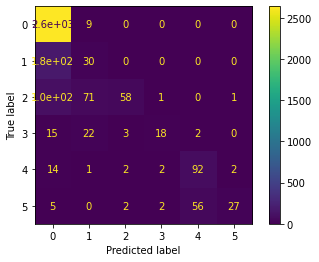

In [ ]:
plot_confusion_matrix(knn, X_test_scaled, y_test)  
plt.show()

**2.Tutaj wrzuciłem Sieć, bez uruchamiania knn (+- 40 min czekania na wyniki)**

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
X_train = np.array(X_train)
X_train.shape

(10080, 6743)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(6, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 6743)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               2023200   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 2,053,906
Trainable params: 2,053,906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=3)

Epoch 1/3
315/315 [==============================] - 5s 15ms/step - loss: 0.0140 - accuracy: 0.9969
Epoch 2/3
315/315 [==============================] - 5s 15ms/step - loss: 0.0072 - accuracy: 0.9979
Epoch 3/3
315/315 [==============================] - 5s 15ms/step - loss: 0.0014 - accuracy: 0.9998


In [ ]:
X_test = np.array(X_test)
XT = X_test[0:1]

In [ ]:
model.predict(X_test[0:1])

array([[9.7732607e-07, 1.0354535e-08, 9.9999821e-01, 6.0125785e-08,
        6.9339484e-07, 5.5656066e-08]], dtype=float32)

In [ ]:
model.evaluate(X_test,y_test)

106/106 [==============================] - 1s 5ms/step - loss: 0.1561 - accuracy: 0.9747


[0.1560516059398651, 0.9747099280357361]